### Set Up

In [39]:
# Installing the Packages

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Set the display format for floats

In [40]:
# Setting the Seed (pandas, statsmodels, matplotlib and y_data_profiling rely on numpy's random generator, and thus, we need to set the seed in numpy)
seed = 2024
np.random.seed(seed)

# Set the display format for floats
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

In [41]:
# Importing the data 
diet_df = pd.read_csv("diet.csv")
recipes_df = pd.read_csv("recipes.csv")
requests_df = pd.read_csv("requests.csv")
reviews_df = pd.read_csv("reviews.csv")

/var/folders/wd/38kzp1bn5139zlz7q02hldnw0000gn/T/ipykernel_72601/2370802839.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_df = pd.read_csv("reviews.csv")


In [42]:
print("Diet Shape: ", diet_df.shape)
print("Recipes Shape: ", recipes_df.shape)
print("Requests Shape: ", requests_df.shape)
print("Reviews Shape: ", reviews_df.shape)

Diet Shape:  (271907, 3)
Recipes Shape:  (75604, 18)
Requests Shape:  (140195, 8)
Reviews Shape:  (140195, 5)


### Cleaning Diet ✅

In [43]:
diet_df

,AuthorId,Diet,Age
0,10000120E,Vegetarian,46
1,1000014D,Vegan,18
2,1000015A,Vegetarian,58
3,1000016E,Vegetarian,32
4,1000027E,Vegan,61
...,...,...,...
271902,999917E,Vegetarian,28
271903,999936C,Omnivore,22
271904,99993D,Vegetarian,58
271905,99994A,Vegetarian,18


In [44]:
# Clean Diet
diet_cleaned = diet_df 

# Replace the missing values with the most common diet
diet_cleaned.loc[diet_df["AuthorId"] == "646062A", "Diet"] = "Vegetarian"

# Dummy Encode the diet column
diet_cleaned = pd.get_dummies(diet_cleaned, columns=["Diet"], prefix=["Diet"])

# create four columns children (0-14), young adults (15-24), adults (25-64), seniors (65+) and encode 1 if the age group is present in the row
diet_cleaned["Children"] = np.where(diet_cleaned["Age"] <= 14, 1, 0)
diet_cleaned["Young Adults"] = np.where((diet_cleaned["Age"] > 14) & (diet_cleaned["Age"] <= 24), 1, 0)
diet_cleaned["Adults"] = np.where((diet_cleaned["Age"] > 24) & (diet_cleaned["Age"] <= 64), 1, 0)
diet_cleaned["Seniors"] = np.where(diet_cleaned["Age"] > 64, 1, 0)



diet_cleaned

,AuthorId,Age,Diet_Omnivore,Diet_Vegan,Diet_Vegetarian,Children,Young Adults,Adults,Seniors
0,10000120E,46,0,0,1,0,0,1,0
1,1000014D,18,0,1,0,0,1,0,0
2,1000015A,58,0,0,1,0,0,1,0
3,1000016E,32,0,0,1,0,0,1,0
4,1000027E,61,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
271902,999917E,28,0,0,1,0,0,1,0
271903,999936C,22,1,0,0,0,1,0,0
271904,99993D,58,0,0,1,0,0,1,0
271905,99994A,18,0,0,1,0,1,0,0


### Cleaning Recipes

In [45]:
recipes_df.head()
recipes_cleaned = recipes_df.copy()

recipes_df["Calories"].describe()


count    75604.00
mean       487.58
std       1496.38
min          0.00
25%        174.70
50%        318.10
75%        530.40
max     350473.10
Name: Calories, dtype: float64

In [46]:
# count the number of beverages

recipes_df["RecipeCategory"].value_counts()

Other            56347
Lunch             4887
One dish meal     4590
Bread             4246
Breakfast         3033
Beverages         2303
Soup               198
Name: RecipeCategory, dtype: int64

In [47]:
# import spacy
# from gensim.models import Word2Vec
# from sklearn.cluster import KMeans
# import pandas as pd

# # Assuming 'recipes' is your DataFrame with a column 'Ingredients'

# # Load the spaCy English model
# nlp = spacy.load("en_core_web_sm")

# # Tokenize and preprocess ingredients using spaCy
# recipes_test['TokenizedIngredients'] = recipes_test['RecipeIngredientParts'].apply(lambda x: [token.text.lower() for token in nlp(x) if token.is_alpha])

# # Train a Word2Vec model
# model = Word2Vec(sentences=recipes_test['TokenizedIngredients'], vector_size=100, window=5, min_count=1, workers=4)

# # Cluster ingredients using k-means
# kmeans = KMeans(n_clusters=10, random_state=42)
# recipes_test['IngredientCategory'] = kmeans.fit_predict(model.wv.vectors)

# # Display the DataFrame with the new column
# print(recipes_test[['RecipeIngredientParts', 'IngredientCategory']])

In [48]:
# show some rows were the recipe category is Other

recipes_df.loc[recipes_df["RecipeCategory"] == "Other"].sample(50)

# extract the recipe category from those recipes that have currently category 'Other' and assign it to one of the existing categories



,RecipeId,Name,CookTime,PrepTime,RecipeCategory,RecipeIngredientQuantities,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield
16848,49380,Buffalo Chicken Dip,3600,1800,Other,"c(""\""4\"""", ""\""0.5\"""", ""\""2\"""", ""\""1\"""", ""\""1\""...","c(""\""boneless skinless chicken breast halves\""...",646.10,59.10,21.70,144.60,1568.80,5.50,0.30,4.20,24.10,NaN,NaN
30444,48485,Poppyseed Sherry Cake,3300,900,Other,"c(""\""1\"""", ""\""1\"""", ""\""4\"""", ""\""3/4\"""", ""\""3/4...","c(""\""instant vanilla pudding\"""", ""\""eggs\"""", ""...",574.90,31.70,3.60,94.30,635.80,63.10,1.40,39.60,6.60,NaN,NaN
19743,487669,Mushroom Sauce,300,120,Other,"c(""\""60\"""", ""\""125\"""", ""\""2\"""", ""\""1 1/2\"""", ""...","c(""\""butter\"""", ""\""mushrooms\"""", ""\""flour\"""", ...",89.80,8.20,5.20,21.40,217.70,3.60,0.40,1.10,1.10,6.00,NaN
3510,46596,Broiled Marinated Beef Kabobs,480,1200,Other,"c(""\""2\"""", ""\""3\"""", ""\""1 1/2\"""", ""\""1/3\"""", ""\...","c(""\""sirloin beef\"""", ""\""minced garlic cloves\...",507.90,42.60,12.30,101.30,517.20,1.10,0.50,0.10,29.00,6.00,NaN
34123,141428,"Low Carb, Keto Zuppa Toscana With Cauliflower ...",2100,600,Other,"c(""\""1\"""", ""\""1\"""", ""\""6\"""", ""\""1\"""", ""\""1\"""",...","c(""\""ghee\"""", ""\""Italian sausage\"""", ""\""chicke...",426.50,30.30,16.60,36.40,1324.90,21.90,3.50,1.10,21.30,8.00,NaN
36750,236165,Thanksgiving Kale Salad (Kale &amp; Quinoa),1020,900,Other,"c(""\""1\"""", ""\""2 1/2\"""", ""\""8\"""", ""\""1/2\"""", ""\...","c(""\""quinoa\"""", ""\""water\"""", ""\""kale\"""", ""\""dr...",281.70,15.30,6.10,20.30,306.50,29.60,4.80,0.60,10.30,NaN,9 cups
72272,253926,Rick's Trout,600,300,Other,"c(""\""4\"""", ""\""1\"""", ""\""1\"""")","c(""\""trout\"""", ""\""cilantro\"""", ""\""green onion\...",22.60,0.20,0.00,0.00,16.50,5.00,2.00,1.50,1.40,NaN,NaN
4439,52284,Nut Roast,3000,900,Other,"c(""\""1\"""", ""\""1\"""", ""\""2\"""", ""\""1\"""", ""\""1\"""",...","c(""\""garlic cloves\"""", ""\""carrot\"""", ""\""celery...",305.50,22.00,4.20,0.00,211.80,20.60,2.00,3.10,7.70,NaN,NaN
46933,13781,Turkey Turnovers,1800,1500,Other,"c(""\""1/2\"""", ""\""1/2\"""", ""\""1\"""", ""\""1\"""", ""\""1...","c(""\""fresh mushrooms\"""", ""\""fresh green beans\...",447.20,31.60,9.00,26.90,244.20,30.80,1.40,1.00,10.30,8.00,NaN
70866,12374,Cowboy Beans,10800,1200,Other,"c(""\""1\"""", ""\""1\"""", ""\""1/2\"""", ""\""1\"""", ""\""1/2...","c(""\""pinto beans\"""", ""\""beer\"""", ""\""thick slab...",192.80,0.90,0.20,0.00,148.40,33.80,10.10,3.90,9.80,5.00,NaN


In [49]:
# Define keywords for each category
category_keywords = {
    'Breakfast': ['breakfast', 'morning', 'brunch', 'pancake', 'smoothie', 'eggs', 'egg', 'muffin', 'muffins', 'waffle', 'waffle' 'french toast', 'omelet', 'crepe', 'crepes', 'frittata', 'quiche', 'hash', 'scramble', 'bagel', 'cereal', 'granola', 'oatmeal', 'porridge', 'toast', 'jam'],
    #'Lunch': ['lunch', 'noon', 'sandwich', 'wrap', 'salad'],
    #'Snack': ['snack', 'appetizer', 'finger food', 'munch'],
    'Dessert': ['dessert', 'cake', 'pie', 'cookie', 'chocolate', 'ice cream', 'tart'],
    'Beverages': ['drink', 'beverage', 'smoothie', 'lemonade', 'juice', 'cocktail', 'coffee', 'tea', 'sangria', 'punch', 'cocoa', 'cider', 'eggnog', 'milkshake', 'margarita', 'wine', 'beer', 'soda'],
    'Soup': ['soup', 'stew', 'chowder', 'gumbo'],
    'Bread': ['bread', 'biscuit', 'scone', 'roll', 'loaf'],
    'Salad': ['salad', 'vinaigrette', 'dressing'],
}

# Function to classify recipe category based on keywords
def classify_category(recipe_name):
    for category, keywords in category_keywords.items():
        if any(keyword in recipe_name.lower() for keyword in keywords):
            return category
    return 'Lunch'

# Apply the function to all rows where the current category is 'Other'

recipes_cleaned.loc[recipes_cleaned["RecipeCategory"] == "Other", "RecipeCategory"] = recipes_cleaned.loc[recipes_cleaned["RecipeCategory"] == "Other", "Name"].apply(classify_category)
#recipes_df['RecipeCategory'] = recipes_df['Name'].apply(classify_category)

recipes_cleaned.sample(20)

,RecipeId,Name,CookTime,PrepTime,RecipeCategory,RecipeIngredientQuantities,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield
16393,199679,Rusty Penny (Penne Rustica),1800,900,Lunch,"c(""\""1\"""", ""\""1/4\"""", ""\""8\"""", ""\""1/2\"""", ""\""2...","c(""\""penne pasta\"""", ""\""pancetta\"""", ""\""fresh ...",405.50,8.80,4.00,145.40,536.40,51.00,6.80,3.80,31.00,8.00,NaN
65329,119541,Pumpkin Muffins,1500,600,Breakfast,"c(""\""1/4\"""", ""\""1\"""", ""\""1/2\"""", ""\""1\"""", ""\""2...","c(""\""brown sugar\"""", ""\""applesauce\"""", ""\""cann...",427.60,10.80,1.80,0.00,537.30,81.00,7.70,37.40,7.30,6.00,6 large muffins
1467,480776,Low-Fat Turkey-in-the-Garden Meatloaf,3600,1200,Bread,"c(""\""1 1/2\"""", ""\""1\"""", ""\""1\"""", ""\""1/2\"""", ""\...","c(""\""ground turkey\"""", ""\""lean ground beef\"""",...",189.40,7.40,1.90,58.90,99.40,10.60,2.40,1.70,20.80,8.00,NaN
65124,415446,Creamed Ham &amp; Potatoes,1200,600,Lunch,"c(""\""6\"""", ""\""1\"""", ""\""2\"""", ""\""2\"""", ""\""1\"""",...","c(""\""potatoes\"""", ""\""onion\"""", ""\""butter\"""", ""...",453.90,14.40,7.00,50.40,699.80,65.10,8.00,3.90,17.60,4.00,NaN
32811,144298,Aloha Pasta for One,300,900,Lunch,"c(""\""2\"""", ""\""2\"""", ""\""1/2\"""", ""\""1\"""")","c(""\""ham\"""", ""\""pineapple chunk\"""")",356.40,4.10,1.20,29.50,865.40,62.30,1.00,18.00,21.50,1.00,NaN
15514,138159,Potato Tart With Zucchini and Radicchio,1200,2400,Dessert,"c(""\""1 1/2\"""", ""\""1\"""", ""\""1/2\"""", ""\""2\"""", ""\...","c(""\""yellow potatoes\"""", ""\""zucchini\"""", ""\""ra...",129.20,0.30,0.10,0.00,15.40,28.90,4.70,2.80,3.50,4.00,1 tart
9845,198488,Barefoot Contessa's Chocolate Orange Mousse,0,2100,Dessert,"c(""\""6\"""", ""\""2\"""", ""\""1/4\"""", ""\""1/4\"""", ""\""1...","c(""\""bittersweet chocolate\"""", ""\""water\"""", ""\...",900.90,82.20,49.00,524.00,180.40,37.10,4.70,26.10,15.70,NaN,NaN
69987,503141,Italian White Bean and Artichoke Salad,0,3600,Salad,"c(""\""2 1/2\"""", ""\""2\"""", ""\""1\"""", ""\""1/4\"""", ""\...","c(""\""red wine vinegar\"""", ""\""olive oil\"""", ""\""...",328.20,7.70,1.20,0.00,294.80,51.50,16.00,4.60,18.50,NaN,NaN
40357,25371,Italian Baked Haddock,1200,600,Lunch,"c(""\""2\"""", ""\""1/2\"""", ""\""1/4\"""", ""\""2\"""", ""\""1...","c(""\""seasoning salt\"""", ""\""black pepper\"""", ""\...",345.80,13.80,7.70,141.50,318.80,14.90,1.50,2.90,39.00,2.00,NaN
49037,291392,Miso Beef,300,600,Lunch,"c(""\""1 1/2\"""", ""\""1\"""", ""\""1\"""", ""\""1\"""", ""\""4...","c(""\""miso\"""", ""\""mirin\"""", ""\""sugar\"""", ""\""sak...",286.90,14.60,5.40,82.90,1017.00,11.10,1.30,5.80,26.40,1.00,NaN


In [50]:
# drop all rows where the recipe category is 'Beverages'

recipes_cleaned = recipes_cleaned[recipes_cleaned["RecipeCategory"] != "Beverages"]

In [51]:
recipes_cleaned["RecipeCategory"].value_counts()

Lunch            37986
Dessert           9674
Breakfast         5763
Bread             5761
One dish meal     4590
Salad             4066
Soup              3695
Name: RecipeCategory, dtype: int64

In [52]:
import re

vegetables = 'carrot|potato|tomato|onion|garlic|broccoli|spinach|cucumber|lettuce|celery|cabbage|cauliflower|corn|pepper|peas|beans|asparagus|eggplant|zucchini|squash|pumpkin|radish|beet|turnip|sprouts|vegetable|vegetables|kale|bell pepper|sweet potato|cherry tomato|artichoke|bok choy|brussels sprouts|butternut squash|leek|okra|snow peas|snap peas|green beans|fennel|watercress|arugula|chard|collard greens|endive|escarole|kohlrabi|mustard greens|pattypan squash|romanesco broccoli|rutabaga|sugar snap peas|swiss chard|tatsoi|water chestnut|yam|daikon|lotus root|bamboo shoots|jicama|plantain|radicchio|turnip greens|water spinach|bitter melon|chayote|chicory|dandelion greens|edamame|lotus root|nopales|portobello mushroom|shiitake mushroom|maitake mushroom|enoki mushroom|oyster mushroom|mushroom|zucchini blossom|artichoke|sunchoke|beets|cardoon|salsify|kale|endive|acorn squash|alfalfa sprout|amaranth|anise|arracacha|arrowroot|aubergine|avocado|azuki bean|banana squash|barbarea verna|basil|bean sprout|beet greens|belgian endive|bell pepper|black bean|black-eyed pea|borage|broad bean|broccoflower|broccolini|brussels sprout|butter lettuce|butternut lettuce|cactus|calabash|camas root|canna|cape gooseberry|caper|cardinal bean|cassava|catsear|cauliflower|cayenne pepper|celeriac|celtuce|chayote|cherry pepper|chickpea|chicory|chili pepper|chinese artichoke|chinese broccoli|chinese cabbage|chinese mallow|chive|cilantro|collard|common bean|courgette|courgette flower|cowpea|cress|crookneck squash|cucumber|daikon|delicata squash|dill|drumstick|earthnut pea|elephant garlic|endive|epazote|fava bean|fennel|fenugreek|fluted pumpkin|french bean|frisee|garbanzo|gem squash|ginger|golden samphire|good king henry|grape leaves|green bean|green soybean|guar|habanero|haricot bean|horseradish|hubbard squash|hyacinth bean|iceberg lettuce|jerusalem artichoke|jicama|jute|kai-lan|kidney bean|kohlrabi|komatsuna|kombu|kuka|lacinto|lagos bologi|land cress|laver|leek|lemon grass|lentil|lettuce|lima bean|linguica|lo bok|lotus root|luffa|mache|malabar spinach|mangetout|mizuna greens|molokhia|monstera|morel|morogo|mung bean|mustard|napa cabbage|new zealand spinach|nopale|oceanic whitetip shark|okra|onion|oregano|orache|pak choy|paprika|parsley|parsnip|pea|peanut|pearl onion|pigeon pea|pignut|pimento|pinto bean|pisello|plantain|poblano|pokeweed|potato|prairie turnip|pumpkin|purslane|radicchio|radish|rape|rapini|raspberry|red bean|red cabbage|red pepper|rhubarb|ricebean|rocket|romanescu|romano bean|rosemary|runner bean|rutabaga|rye|saffron|sage|salad savoy|salsify|samphire|scallion|scarlet runner bean|sea kale|seakale beet|sesame|shallot|shiitake|skirret|sloe|snake bean|snow pea|sorrel|sour cherry|southern pea|soybean|spaghetti squash|spinach|spring onion|squash|squash blossom|swede|sweet corn|sweet pepper|sweet potato|swiss chard|taro|tatsoi|thyme|tomatillo|tomato|topinambour|tubers|turmeric|turnip|turnip greens|ugli fruit|ursolic acid|uva-ursi|vates|water chestnut|water spinach|watercress|wax bean|wax gourd|welsh onion|west indian gherkin|white bean|white radish|wild leek|wild rice|winged bean|winter melon|winter squash|yam bean|yardlong bean|yellow squash|yu choy|zucchini'
meats = 'chicken|beef|pork|lamb|turkey|duck|goose|fish|seafood|salmon|shrimp|crab|lobster|ham|bacon|sausage|meat|steak|veal|venison|bison|liver|lamb|poultry|meat|tuna|mackerel|trout|haddock|cod|catfish|tilapia|sardine|anchovy|halibut|swordfish|monkfish|eel|octopus|squid|clams|mussels|oysters|snail|game|partridge|pheasant|quail|rabbit|hare|wild boar|elk|moose|reindeer|buffalo|ostrich|emu|kangaroo|alligator|frog legs|snapper|grouper|barracuda|carp|pike|perch|flounder|sole|mahi mahi|red snapper|swordfish|branzino|char|chub|mullet|ray|skate|sturgeon|turbot|whiting|arctic char|caviar|roe|scallop|sea urchin|abalone|crayfish|langoustine|prawn|cuttlefish|jellyfish|stingray|barramundi|black cod|bluefish|bonito|bream|burbot|butterfish|capelin|chimaera|conger|coral trout|dab|dace|dogfish|dorado|dory|drum|escolar|garfish|gilt-head bream|hake|herring|John Dory|kingfish|lamprey|lingcod|lumpsucker|marlin|milkfish|nile perch|northern pike|orange roughy|pacific saury|patagonian toothfish|pollock|pomfret|pompano|rockfish|rudd|sablefish|sanddab|sculpin|sea bass|shark|sheepshead|silver carp|skipjack tuna|smelt|snook|sockeye salmon|sole|sprat|striped bass|sturgeon|surimi|tarpon|tench|wahoo|walleye|warmouth|weakfish|whitebait|whitefish|yellowtail|zebrafish'
dairy = 'milk|cheese|yogurt|cream|butter|buttermilk|sour cream|cottage cheese|mascarpone|ricotta|cream cheese|mozzarella|cheddar|brie|feta|parmesan|gouda|havarti|blue cheese|goat cheese|swiss cheese|provolone|muenster cheese|asiago|colby jack|mozzarella sticks|queso fresco|queso blanco|halloumi|neufchâtel|ghee|clotted cream'
fruits = 'apple|banana|orange|grape|strawberry|blueberry|raspberry|blackberry|cherry|peach|pear|plum|pineapple|kiwi|lemon|lime|grapefruit|cantaloupe|watermelon|pomegranate|nectarine|apricot|fig|guava|lychee|mango|papaya|persimmon|star fruit|tangerine|dragon fruit|passion fruit|jackfruit|durian|breadfruit|quince|cranberry|currant|elderberry|gooseberry|boysenberry|lingonberry|mulberry|olive|date|prune|raisin|clementine|kumquat|tangelo|blood orange|carambola|loquat|ugli fruit|breadfruit|cherimoya|custard apple|guanabana|guava|horned melon|jujube|kiwano|kumquat|longan|lychee|mangosteen|marionberry|miracle fruit|papaya|persimmon|pomelo|quince|rambutan|sapodilla|tamarillo|tamarind|ugli fruit|yuzu|acai berry|ackee|araza|barbadine|bilberry|black sapote|blackcurrant|blueberry|boysenberry|breadfruit|canistel|cempedak|cherry|cloudberry|coconut|cranberry|cupuacu|currant|damson plum|durian|elderberry|feijoa|fig|goji berry|gooseberry|grape|grapefruit|guava|honeyberry|huckleberry|jabuticaba|jackfruit|jambul|jujube|juniper berry|kiwano|kiwi|kumquat|lemon|lime|lingonberry|loganberry|longan|loquat|lychee|mandarin orange|mango|marionberry|melon|mulberry|nectarine'
alcohol = 'beer|wine|vodka|gin|rum|tequila|whiskey|brandy|bourbon|scotch|cognac|liqueur|vermouth|sherry|port|sake|champagne|prosecco|cider|mead|absinthe|amaretto|aperol|aquavit|armagnac|bitters|campari|chartreuse|cointreau|creme de cacao|creme de menthe|curacao|drambuie|frangelico|grand marnier|kahlua|lillet|limoncello|maraschino|midori|pastis|pisco|sambuca|schnapps|sloe gin|st. germain|triple sec|vermouth|absinthe|amaretto|aperol|aquavit|armagnac|bitters|campari|chartreuse|cointreau|creme de cacao|creme de menthe|curacao|drambuie|frangelico|grand marnier|kahlua|lillet|limoncello|maraschino|midori|pastis|pisco|sambuca|schnapps|sloe gin|st. germain|triple sec|vermouth'
gluten_containing_grains = 'wheat|barley|rye|spelt|farro|kamut|triticale|bulgur|couscous|seitan|matzo|matzah|matzo meal|cake flour|pastry flour|bread flour|durum|semolina|einkorn|emmer|beer|ale|lager|porter|stout|malt|malt vinegar|soy sauce|teriyaki sauce|hoisin sauce|gravy|breadcrumbs|breaded|crouton|pretzel|pasta|noodle|gnocchi|dumpling|panko|sourdough|bagel|croissant|pita|naan|biscuit|scone|muffin|doughnut|pancake|waffle|pie crust|cake|pastry|cookie|brownie|cereal|granola|oats|oatmeal|oat bran|breakfast bars|communion wafer|play dough'
nuts_seeds = 'almond|brazil nut|cashew|chestnut|filbert|hazelnut|macadamia nut|pecan|pine nut|pistachio|walnut|peanut|sunflower seed|pumpkin seed|sesame seed|flaxseed|chia seed|poppy seed|hemp seed|safflower seed|black seed|pomegranate seed|grape seed|apricot kernel|prune kernel|coconut|almond butter|cashew butter|peanut butter|sunflower seed butter|pumpkin seed butter|tahini (sesame seed butter)|nut butter|macadamia butter|pistachio butter|walnut butter|hazelnut butter|chestnut flour|almond flour|coconut flour|sunflower seed flour|flaxseed meal|chia flour|poppy seed oil|hemp seed oil|grape seed oil|walnut oil|almond oil|hazelnut oil|macadamia oil|pecan oil|pine nut oil|pistachio oil|acorn|beechnut|butternut|hickory nut|lychee nut|mongongo nut|pili nut|shea nut|soap nut|tiger nut|colocynth|guarana|jack nut|kola nut|malabar chestnut|ogbono nut|paradise nut|sapucaia nut|souari nut|tonka bean'

#print('|'.join([f'{item}s?' for item in gluten_containing_grains.split('|')]))

def extract_ingredients(row, string):

    ingredients = row.split(',')
    cleaned_ingredients = [ingredient.replace('\\', '').replace('"', '').strip() for ingredient in ingredients]
    cleaned_ingredients = [ingredient.replace('c(', '') for ingredient in cleaned_ingredients]
    
    plural_string = '|'.join([f'{item}s?' for item in string.split('|')])

    count = 0
    for ingredient in cleaned_ingredients: 
        if bool(re.search(plural_string, ingredient, re.IGNORECASE)):
            #print(ingredient)
            #print(plural_string[0])
            #print(ingredient)
            count += 1

    #print(cleaned_ingredients)
    #print(vegetables_count)
    
    return count

recipes_cleaned['VegetableCount'] = recipes_cleaned['RecipeIngredientParts'].apply(lambda row: extract_ingredients(row, vegetables))
recipes_cleaned['MeatCount'] = recipes_cleaned['RecipeIngredientParts'].apply(lambda row: extract_ingredients(row, meats))
recipes_cleaned['DairyCount'] = recipes_cleaned['RecipeIngredientParts'].apply(lambda row: extract_ingredients(row, dairy))
recipes_cleaned['FruitsCount'] = recipes_cleaned['RecipeIngredientParts'].apply(lambda row: extract_ingredients(row, fruits))
recipes_cleaned['AlcoholCount'] = recipes_cleaned['RecipeIngredientParts'].apply(lambda row: extract_ingredients(row, alcohol))
recipes_cleaned['GlutenContainingGrainsCount'] = recipes_cleaned['RecipeIngredientParts'].apply(lambda row: extract_ingredients(row, gluten_containing_grains))
recipes_cleaned['NutsAndSeedsCount'] = recipes_cleaned['RecipeIngredientParts'].apply(lambda row: extract_ingredients(row, nuts_seeds))

In [53]:
# Add Number of Quantities

recipes_cleaned['Number of Ingredients'] = recipes_cleaned['RecipeIngredientParts'].str.count(',') + 1

In [54]:
# Drop the 'Name' column
recipes_cleaned.drop(columns=['Name'], inplace=True)

# Handling the Time columns 
recipes_cleaned["TotalTimeRequired"] = recipes_cleaned["CookTime"] + recipes_cleaned["PrepTime"]
recipes_cleaned.drop(["CookTime", "PrepTime"], axis=1, inplace=True)

# Handling the RecipeCategory column
recipes_cleaned = pd.get_dummies(recipes_cleaned, columns=['RecipeCategory'], drop_first=True)

# Handling the RecipeIngredientQuantities column
recipes_cleaned.drop(columns=['RecipeIngredientQuantities'], inplace=True)

# Handling the RecipeIngredientParts column
recipes_cleaned.drop(columns=['RecipeIngredientParts'], inplace=True)

# Handling the Calories column
recipes_cleaned.loc[recipes_cleaned["Calories"] > 30000, "Calories"] = recipes_cleaned["Calories"].median()

# Handling the CholesterolContent column
recipes_cleaned.drop(columns=['CholesterolContent'], inplace=True)

# Handling the SodiumContent column
recipes_cleaned.drop(columns=['SodiumContent'], inplace=True)

# Handling the RecipeServings column
recipes_cleaned.drop(columns=['RecipeServings'], inplace=True)

# Handling the RecipeYield column
recipes_cleaned.drop(columns=['RecipeYield'], inplace=True)

In [55]:
# Add complexity value consisting of time and number of ingredients

recipes_cleaned['Complexity'] = (0.5 * recipes_cleaned['TotalTimeRequired']) + (0.5 * recipes_cleaned['Number of Ingredients'])

In [56]:
# FatContent, SaturatedFatContent, CarbohydrateContent, FiberContent, SugarContent, ProteinContent

# FatContent
recipes_cleaned.loc[recipes_cleaned["FatContent"] > 100, "FatContent"] = recipes_cleaned["FatContent"].median()

# SaturatedFatContent
recipes_cleaned.loc[recipes_cleaned["SaturatedFatContent"] > 100, "SaturatedFatContent"] = recipes_cleaned["SaturatedFatContent"].median()

# CarbohydrateContent
recipes_cleaned.loc[recipes_cleaned["CarbohydrateContent"] > 100, "CarbohydrateContent"] = recipes_cleaned["CarbohydrateContent"].median()

# FiberContent
recipes_cleaned.loc[recipes_cleaned["FiberContent"] > 100, "FiberContent"] = recipes_cleaned["FiberContent"].median()

# SugarContent
recipes_cleaned.loc[recipes_cleaned["SugarContent"] > 100, "SugarContent"] = recipes_cleaned["SugarContent"].median()

# ProteinContent
recipes_cleaned.loc[recipes_cleaned["ProteinContent"] > 100, "ProteinContent"] = recipes_cleaned["ProteinContent"].median()

#### Cleaning Requests ✅

In [57]:
requests_df.head()
requests_cleaned = requests_df.copy()

TODO:

- Age mit rein
- beverages anschauen (other irgednwie aufteilen)

In [58]:
# Handling the Time Column 
# Replace negative values in the Time Column with a very high number
requests_cleaned.loc[requests_cleaned["Time"] < 0, "Time"] = 1000000000000000000

# Handling the HighCalories column 
requests_cleaned['HighCalories'] = requests_df['HighCalories'].astype('int')

# Handling the HighProtein column
requests_cleaned['HighProtein'] = requests_df['HighProtein'].map({'Yes': 1, 'Indifferent': 0})

# Handling the LowFat column

# Handling the LowSugar column
requests_cleaned['LowSugar'] = requests_df['LowSugar'].map({'0': 1, 'Indifferent': 0})

requests_cleaned


,AuthorId,RecipeId,Time,HighCalories,HighProtein,LowFat,LowSugar,HighFiber
0,2001012259B,73440,1799.95,0,0,0,1,0
1,437641B,365718,4201.82,0,1,0,0,1
2,1803340263D,141757,6299.86,0,0,1,0,0
3,854048B,280351,19801.37,0,1,1,1,1
4,2277685E,180505,5400.09,0,0,0,1,0
...,...,...,...,...,...,...,...,...
140190,163793B,78171,1560.65,0,0,0,1,1
140191,33888B,333262,1502.01,1,0,1,1,0
140192,401942C,49200,5999.27,0,0,0,1,1
140193,346866B,214815,899.52,0,1,1,0,1


#### Cleaning Reviews ✅

In [59]:
reviews_df.head()
reviews_cleaned = reviews_df.copy()

In [60]:
# Handling the Rating Column 
# Replace the missing values with 0
reviews_cleaned['Rating'].fillna(0, inplace=True)

#reviews_cleaned.drop(columns=['Rating'], inplace=True)

# Handling the Like Column 
reviews_cleaned['Like'] = reviews_cleaned['Like'].map({True: 1, False: 0})


# Handling the TestSetId Column

reviews_cleaned



,AuthorId,RecipeId,Rating,Like,TestSetId
0,2492191A,33671,2.00,NaN,1.00
1,2002019979A,92647,2.00,NaN,2.00
2,408594E,161770,0.00,NaN,3.00
3,2001625557E,108231,2.00,NaN,4.00
4,2001427116E,71109,0.00,NaN,5.00
...,...,...,...,...,...
140190,999595E,338070,2.00,0.00,NaN
140191,999774A,29002,2.00,0.00,NaN
140192,999774A,159252,0.00,0.00,NaN
140193,999774A,1171,2.00,1.00,NaN


#### Data Merging

In [62]:
print("Diet Shape: ", diet_cleaned.shape)
print("Recipes Shape: ", recipes_cleaned.shape)
print("Requests Shape: ", requests_cleaned.shape)
print("Reviews Shape: ", reviews_cleaned.shape)

Diet Shape:  (271907, 9)
Recipes Shape:  (71535, 24)
Requests Shape:  (140195, 8)
Reviews Shape:  (140195, 5)


In [63]:
full_df = pd.merge(requests_cleaned, reviews_cleaned, on=['RecipeId', 'AuthorId'])
full_df = pd.merge(full_df, recipes_cleaned, on=['RecipeId'])
full_df = pd.merge(full_df, diet_cleaned, on=['AuthorId'])

print(full_df.shape)

full_df.loc[full_df["RecipeId"] == 133043]

full_df.dtypes


(133071, 42)


AuthorId                         object
RecipeId                          int64
Time                            float64
HighCalories                      int64
HighProtein                       int64
LowFat                            int64
LowSugar                          int64
HighFiber                         int64
Rating                          float64
Like                            float64
TestSetId                       float64
Calories                        float64
FatContent                      float64
SaturatedFatContent             float64
CarbohydrateContent             float64
FiberContent                    float64
SugarContent                    float64
ProteinContent                  float64
VegetableCount                    int64
MeatCount                         int64
DairyCount                        int64
FruitsCount                       int64
AlcoholCount                      int64
GlutenContainingGrainsCount       int64
NutsAndSeedsCount                 int64


### Full DF Data Engineering

In [64]:
# Cross Data Engineernig 

# TimeRequestFulfilled -> 1, if TotalTime is less Time
full_df = full_df.assign(TimeRequestFulfilled = np.where(full_df['TotalTimeRequired'] <= full_df['Time'], 1, 0))

# VegetarianRequestFulfilled -> 1, if Diet_Vegetarian is 1 and ProteinContent is in the 0.5 quantile
#full_df = full_df.assign(VegetarianRequestFulfilled = np.where((full_df['Diet_Vegetarian'] == 1) & (full_df['MeatCount'] == 0), 1, 0))

# VeganRequestFulfilled -> 1, if Diet_Vegan is 1 and ProteinContent is in the 0.5 quantile
#full_df = full_df.assign(VeganRequestFulfilled = np.where((full_df['Diet_Vegan'] == 1) & (full_df['MeatCount'] == 0) & (full_df['DairyCount'] == 0), 1, 0))

# High Calories -> 1, if HighCalories is 1 and if CaloriesContent is more than 500 
full_df = full_df.assign(HighCaloriesRequestFulfilled = np.where((full_df["HighCalories"] == 1) & (full_df['Calories'] >= 300), 1, 0))
full_df = full_df.assign(HighCaloriesRequestFulfilled = np.where((full_df["HighCalories"] == 0) & (full_df['Calories'] < 300), 1, 0))

# LowFatRequestFulfilled -> 1, if LowFat is 1, and FatContent is less than 3
full_df = full_df.assign(LowFatRequestFulfilled = np.where((full_df['LowFat'] == 1) & (full_df['FatContent'] < 13), 1, 0))
full_df = full_df.assign(LowFatRequestFulfilled = np.where((full_df['LowFat'] == 0) & (full_df['FatContent'] >= 13), 1, 0))

# HighProteinRequestFulfilled -> 1, if ProteinContent is more than 25 
full_df = full_df.assign(HighProteinRequestFulfilled = np.where((full_df["HighProtein"] == 1) & (full_df['ProteinContent'] >= 25), 1, 0))
full_df = full_df.assign(HighProteinRequestFulfilled = np.where((full_df["HighProtein"] == 0) & (full_df['ProteinContent'] < 25), 1, 0))

# LowSugarRequestFulfilled -> 1, if LowSugar is 1, and SugarContent is less than 5
full_df = full_df.assign(LowSugarRequestFulfilled = np.where((full_df['LowSugar'] == 1) & (full_df['SugarContent'] < 6), 1, 0))
full_df = full_df.assign(LowSugarRequestFulfilled = np.where((full_df['LowSugar'] == 0) & (full_df['SugarContent'] >= 6), 1, 0))

# HighFiberRequestFulfilled -> 1, if FiberContent is more than 10
full_df = full_df.assign(HighFiberRequestFulfilled = np.where((full_df['HighFiber'] == 1) & (full_df['FiberContent'] >= 4.5), 1, 0))
full_df = full_df.assign(HighFiberRequestFulfilled = np.where((full_df['HighFiber'] == 0) & (full_df['FiberContent'] < 4.5), 1, 0))

# VegeterianRequestFulfilled -> 1, if Diet_Vegetarian is 1 and MeatCount is 0
full_df = full_df.assign(VegeterianRequestNotFulfilled = np.where((full_df['Diet_Vegetarian'] == 1) & (full_df['MeatCount'] == 0), 1, 0))

# VeganRequestFulfilled -> 1, if Diet_Vegan is 1 and MeatCount is 0 and DairyCount is 0
full_df = full_df.assign(VeganRequestNotFulfilled = np.where((full_df['Diet_Vegan'] == 1) & ((full_df['MeatCount'] == 0) | (full_df['DairyCount'] == 0)), 1, 0))

# OmnivoreRequestFulfilled -> 1, if Diet_Vegan is 0 and Diet_Vegetarian is 0 and MeatCount is not 0
full_df = full_df.assign(OmnivoreRequestFulfilled = np.where((full_df['Diet_Vegan'] == 0) & (full_df['Diet_Vegetarian'] == 0) & (full_df['MeatCount'] != 0), 1, 0))

#full_df["VeganRequestNotFulfilled"].value_counts() 

full_df["total_unhealthy_grams"] = full_df["FatContent"] + full_df["CarbohydrateContent"]

full_df["CaloriesToSugarContent"] = np.where(full_df["SugarContent"] == 0, 0, full_df["Calories"] / full_df["SugarContent"])


In [65]:
# Breakfast_quick -> 1, if RecipeCategory_Breakfast is 1 and TotalTime is less than 600
#full_df = full_df.assign(BreakfastQuick = np.where((full_df['RecipeCategory_Breakfast'] == 1) & (full_df['TotalTimeRequired'] <= 600), 1, 0))

In [66]:
#full_df['BreakfastQuick'].value_counts()

In [67]:
full_df_submission = full_df[full_df["Like"].isnull()]
full_df_modelling = full_df[full_df["Like"].notnull()]

In [68]:
# show some rows were like is 1

full_df_modelling.loc[full_df_modelling["Like"] == 1].sample(20)

,AuthorId,RecipeId,Time,HighCalories,HighProtein,LowFat,LowSugar,HighFiber,Rating,Like,...,HighCaloriesRequestFulfilled,LowFatRequestFulfilled,HighProteinRequestFulfilled,LowSugarRequestFulfilled,HighFiberRequestFulfilled,VegeterianRequestNotFulfilled,VeganRequestNotFulfilled,OmnivoreRequestFulfilled,total_unhealthy_grams,CaloriesToSugarContent
37127,1802648499A,147440,4200.73,1,1,1,0,0,0.00,1.00,...,0,0,0,0,1,1,0,0,50.20,64.78
105506,683972C,7687,3901.27,0,0,0,0,0,0.00,1.00,...,0,1,1,1,1,1,0,0,66.80,12.78
120997,1287446D,104930,12600.13,0,0,1,0,0,2.00,1.00,...,1,0,1,0,1,1,0,0,8.50,50.78
131742,1800842704A,193316,900.38,0,0,0,1,1,0.00,1.00,...,0,1,1,0,0,0,0,0,71.70,16.42
69436,976375E,58052,8999.94,0,0,1,1,1,2.00,1.00,...,1,0,1,0,0,1,0,0,6.20,4.33
12197,1137048B,53843,1799.61,0,0,0,1,0,0.00,1.00,...,0,1,1,0,1,0,0,0,55.10,95.46
95143,2000819004C,60350,1798.87,0,0,1,1,1,2.00,1.00,...,1,0,0,0,0,0,0,1,15.60,96.41
85442,432109D,61849,2099.91,0,0,0,0,0,2.00,1.00,...,0,0,0,0,1,0,0,0,37.10,3078.00
94816,2017507C,24306,661.69,1,0,0,1,0,0.00,1.00,...,0,1,0,0,1,0,0,1,68.60,87.98
46458,2924292E,161337,1020.45,0,1,0,0,1,2.00,1.00,...,1,0,0,0,0,0,0,0,10.10,60.67


In [69]:
# Scaling

#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import RobustScaler

#standard_scaler = StandardScaler()
#robust_scaler = RobustScaler()

# Scale all columns where it makes sense and select them

##columns_to_scale = ['Time', 'Calories', 'FatContent', 'SaturatedFatContent', 'CarbohydrateContent', 
#                    'FiberContent', 'SugarContent', 'ProteinContent', 'TotalTimeRequired']

#full_df_modelling[columns_to_scale] = robust_scaler.fit_transform(full_df_modelling[columns_to_scale])

In [70]:
from sklearn.model_selection import train_test_split


X = full_df_modelling.drop(["AuthorId", "RecipeId", "Like", "TestSetId", "Rating"], axis=1)
y = full_df_modelling["Like"]

X_train, X_test, y_train, y_test = \
  train_test_split(X, y,
                   test_size=0.3, 
                   shuffle=True,
                   random_state=seed)

In [71]:
X_test

,Time,HighCalories,HighProtein,LowFat,LowSugar,HighFiber,Calories,FatContent,SaturatedFatContent,CarbohydrateContent,...,HighCaloriesRequestFulfilled,LowFatRequestFulfilled,HighProteinRequestFulfilled,LowSugarRequestFulfilled,HighFiberRequestFulfilled,VegeterianRequestNotFulfilled,VeganRequestNotFulfilled,OmnivoreRequestFulfilled,total_unhealthy_grams,CaloriesToSugarContent
60573,2219.19,1,0,0,1,0,198.60,16.60,4.30,8.20,...,0,1,1,0,1,1,0,0,24.80,24.52
73105,1499.65,1,0,1,0,0,856.50,41.60,11.10,28.90,...,0,0,1,1,0,1,0,0,70.50,59.90
18423,3599.86,0,0,1,1,1,142.90,8.80,1.20,13.50,...,1,0,1,0,0,1,0,0,22.30,142.90
112414,1199.65,0,0,0,1,0,419.60,20.80,9.20,59.80,...,0,1,1,0,0,1,0,0,80.60,9.47
88505,4500.94,0,0,0,0,0,842.50,57.00,17.80,32.50,...,0,1,0,0,1,0,0,0,89.50,280.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110560,2100.06,1,1,1,1,1,435.20,33.30,13.50,10.20,...,0,0,0,0,0,0,0,1,43.50,83.69
16393,261900.32,0,1,0,1,0,461.10,19.50,12.70,69.30,...,0,1,0,0,1,1,0,0,88.80,8.34
74280,898.79,0,0,1,1,0,331.90,6.40,1.70,49.00,...,0,0,0,0,0,0,0,0,55.40,53.53
82396,599.94,1,1,1,1,0,796.60,0.00,0.00,28.90,...,0,0,0,0,1,1,0,0,28.90,124.47


0.7094927735628507
confusion matrix
[[22099  2047]
 [ 1781  1808]]
classification report
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92     24146
         1.0       0.47      0.50      0.49      3589

    accuracy                           0.86     27735
   macro avg       0.70      0.71      0.70     27735
weighted avg       0.87      0.86      0.86     27735



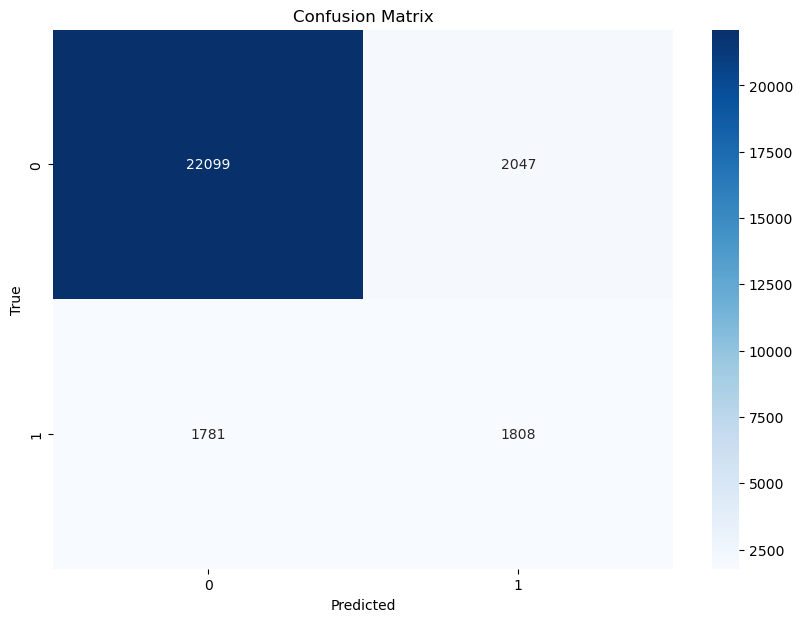

In [72]:
# Run a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Create the model
dt = DecisionTreeClassifier(random_state=seed)

# Fit the model
dt.fit(X_train, y_train)

predictions = dt.predict(X_test)

# Calculate the balanced accuracy score
print(balanced_accuracy_score(y_test, predictions))

# Evaluate model
print("confusion matrix")
print(confusion_matrix(y_test, predictions))
print("classification report")
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)

# Plotting using seaborn for better visualization
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


0.73008106831856
confusion matrix
[[23396   750]
 [ 1826  1763]]
classification report
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     24146
         1.0       0.70      0.49      0.58      3589

    accuracy                           0.91     27735
   macro avg       0.81      0.73      0.76     27735
weighted avg       0.90      0.91      0.90     27735



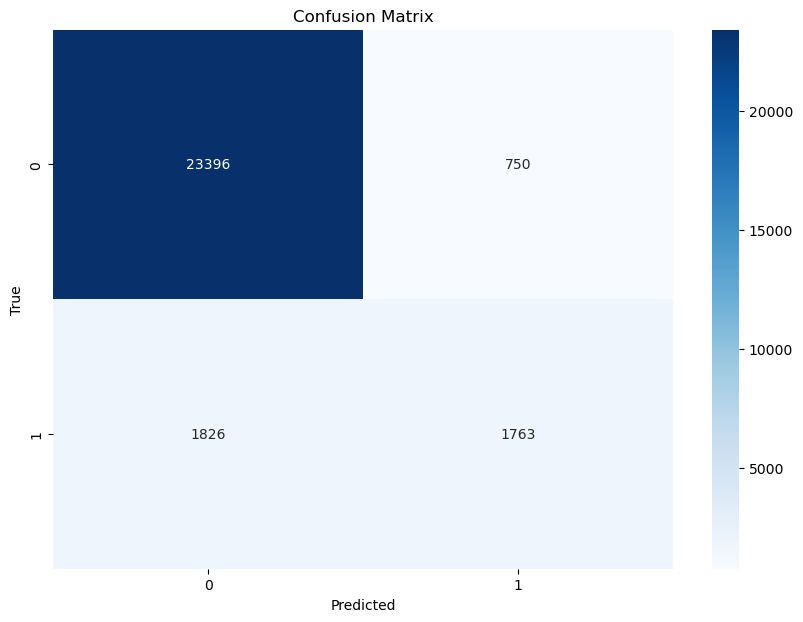

In [73]:
# Run the GradientBooster2000
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import balanced_accuracy_score

# Create the model
gb_model = GradientBoostingClassifier(n_estimators=2000)

# Fit the model
gb_model.fit(X_train, y_train)

predictions = gb_model.predict(X_test)

# Calculate the balanced accuracy score
print(balanced_accuracy_score(y_test, predictions))

# Evaluate model
print("confusion matrix")
print(confusion_matrix(y_test, predictions))
print("classification report")
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)

# Plotting using seaborn for better visualization
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [74]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# print('Original dataset shape %s' % Counter(y))

# # Apply SMOTE
# sm = SMOTE(random_state=seed)
# X_res, y_res = sm.fit_resample(X, y)
# print('Resampled dataset shape %s' % Counter(y_res))